In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import spiceypy as spice

In [4]:
# SPICE test
spice.tkvrsn('TOOLKIT')

'CSPICE_N0067'

Import JUICE Lib

In [5]:
import sys

# import JUICE lib
sys.path.append('../lib/')
import juice_spice_lib as juice_lib

Load SPICE kernels

In [6]:
# load SPICE ketnels
#source_dir = 'C:/share/Linux/doc/spice/juice/kernels/'
source_dir = '/Users/Shared/spice/juice/kernels/'

juice_lib.spice_ini(source_dir)

JUICE orbit near Moon (LGA)

In [7]:
# set date/time
utctim = '2024-08-19T20:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 60*60*2  # number of data
dt = 1    # time step [second]
et = et_ex + dt * np.arange(0, nd)

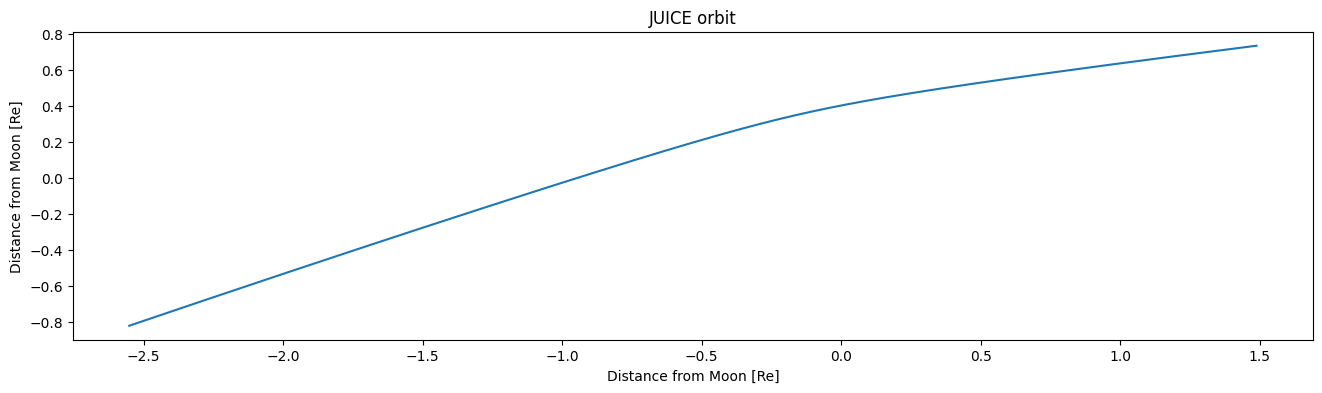

In [8]:
# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos_xref(et, ref='IAU_MOON', tar='JUICE', org='MOON', x_ref='EARTH')

# plot
re = 6400.0  # km
plt.figure(figsize=(16, 4))
plt.plot(x/re, y/re)
plt.title('JUICE orbit')
plt.xlabel('Distance from Moon [Re]')
plt.ylabel('Distance from Moon [Re]')
plt.show()

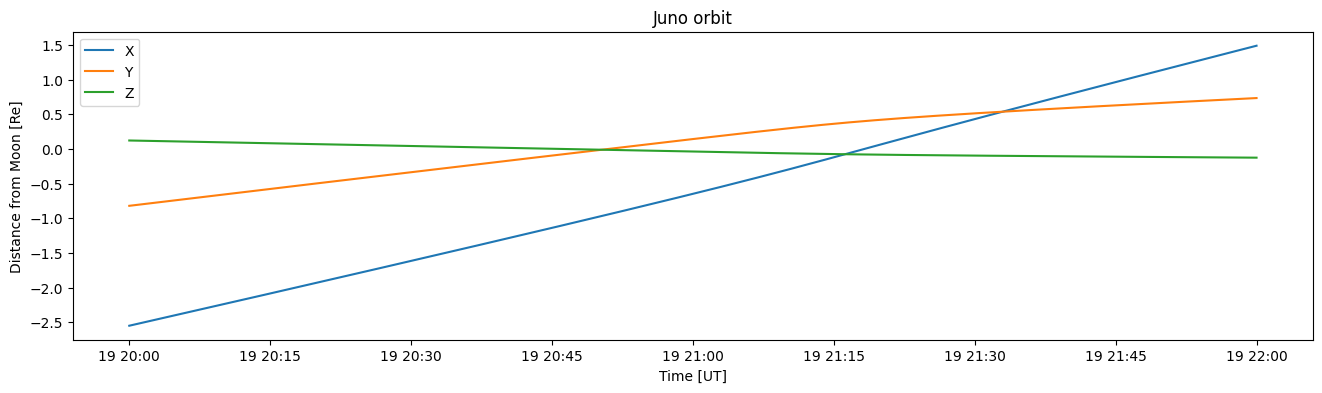

In [9]:
# plot
td = spice.et2datetime(et)
re = 6400.0  # km
plt.figure(figsize=(16, 4))
plt.plot(td, x/re, label='X')
plt.plot(td, y/re, label='Y')
plt.plot(td, z/re, label='Z')
plt.title('Juno orbit')
plt.legend()
plt.xlabel('Time [UT]')
plt.ylabel('Distance from Moon [Re]')
plt.show()

JUICE orbit seen from Earth to Moon

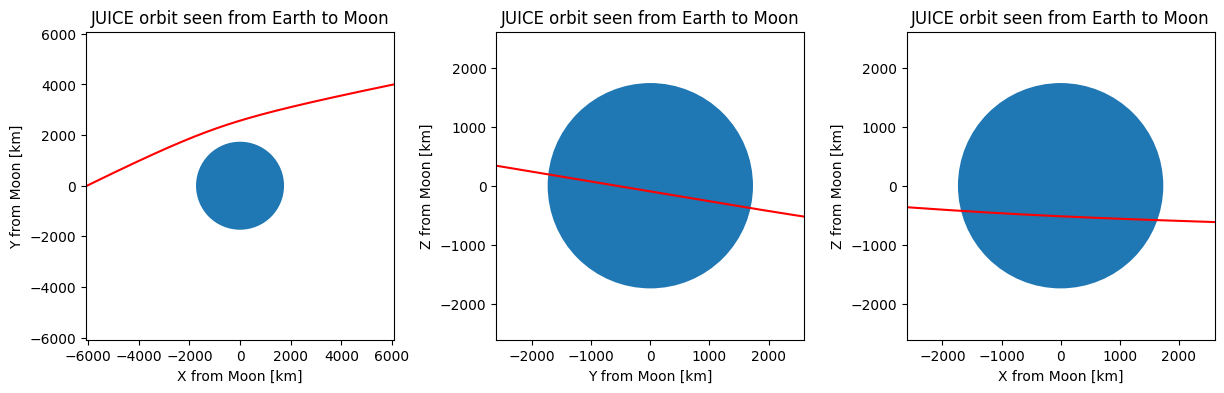

In [10]:
# calculate target position with spice
rl = 1737.4 # [km]
xm, ym, zm, rm, lat_m, lon_m = juice_lib.get_pos_xref(et, ref='IAU_MOON', tar='JUICE', org='MOON', x_ref='EARTH')

# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15.0, 4.0))

c = patches.Circle(xy=(0.0,0.0), radius=rl)
ax1.add_patch(c)
ax1.plot(xm, ym, 'r')
ax1.set_title('JUICE orbit seen from Earth to Moon')
ax1.set_xlabel('X from Moon [km]')
ax1.set_ylabel('Y from Moon [km]')
ax1.set_xlim([-rl*3.5,rl*3.5])
ax1.set_ylim([-rl*3.5,rl*3.5])
ax1.set_aspect("equal", adjustable="box")

c = patches.Circle(xy=(0.0,0.0), radius=1737.4)
ax2.add_patch(c)
ax2.plot(ym, zm, 'r')
ax2.set_title('JUICE orbit seen from Earth to Moon')
ax2.set_xlabel('Y from Moon [km]')
ax2.set_ylabel('Z from Moon [km]')
ax2.set_xlim([-rl*1.5,rl*1.5])
ax2.set_ylim([-rl*1.5,rl*1.5])
ax2.set_aspect("equal", adjustable="box")

c = patches.Circle(xy=(0.0,0.0), radius=1737.4)
ax3.add_patch(c)
ax3.plot(xm, zm, 'r')
ax3.set_title('JUICE orbit seen from Earth to Moon')
ax3.set_xlabel('X from Moon [km]')
ax3.set_ylabel('Z from Moon [km]')
ax3.set_xlim([-rl*1.5,rl*1.5])
ax3.set_ylim([-rl*1.5,rl*1.5])
ax3.set_aspect("equal", adjustable="box")

Text(0, 0.5, 'dR/dt [km/0.2s]')

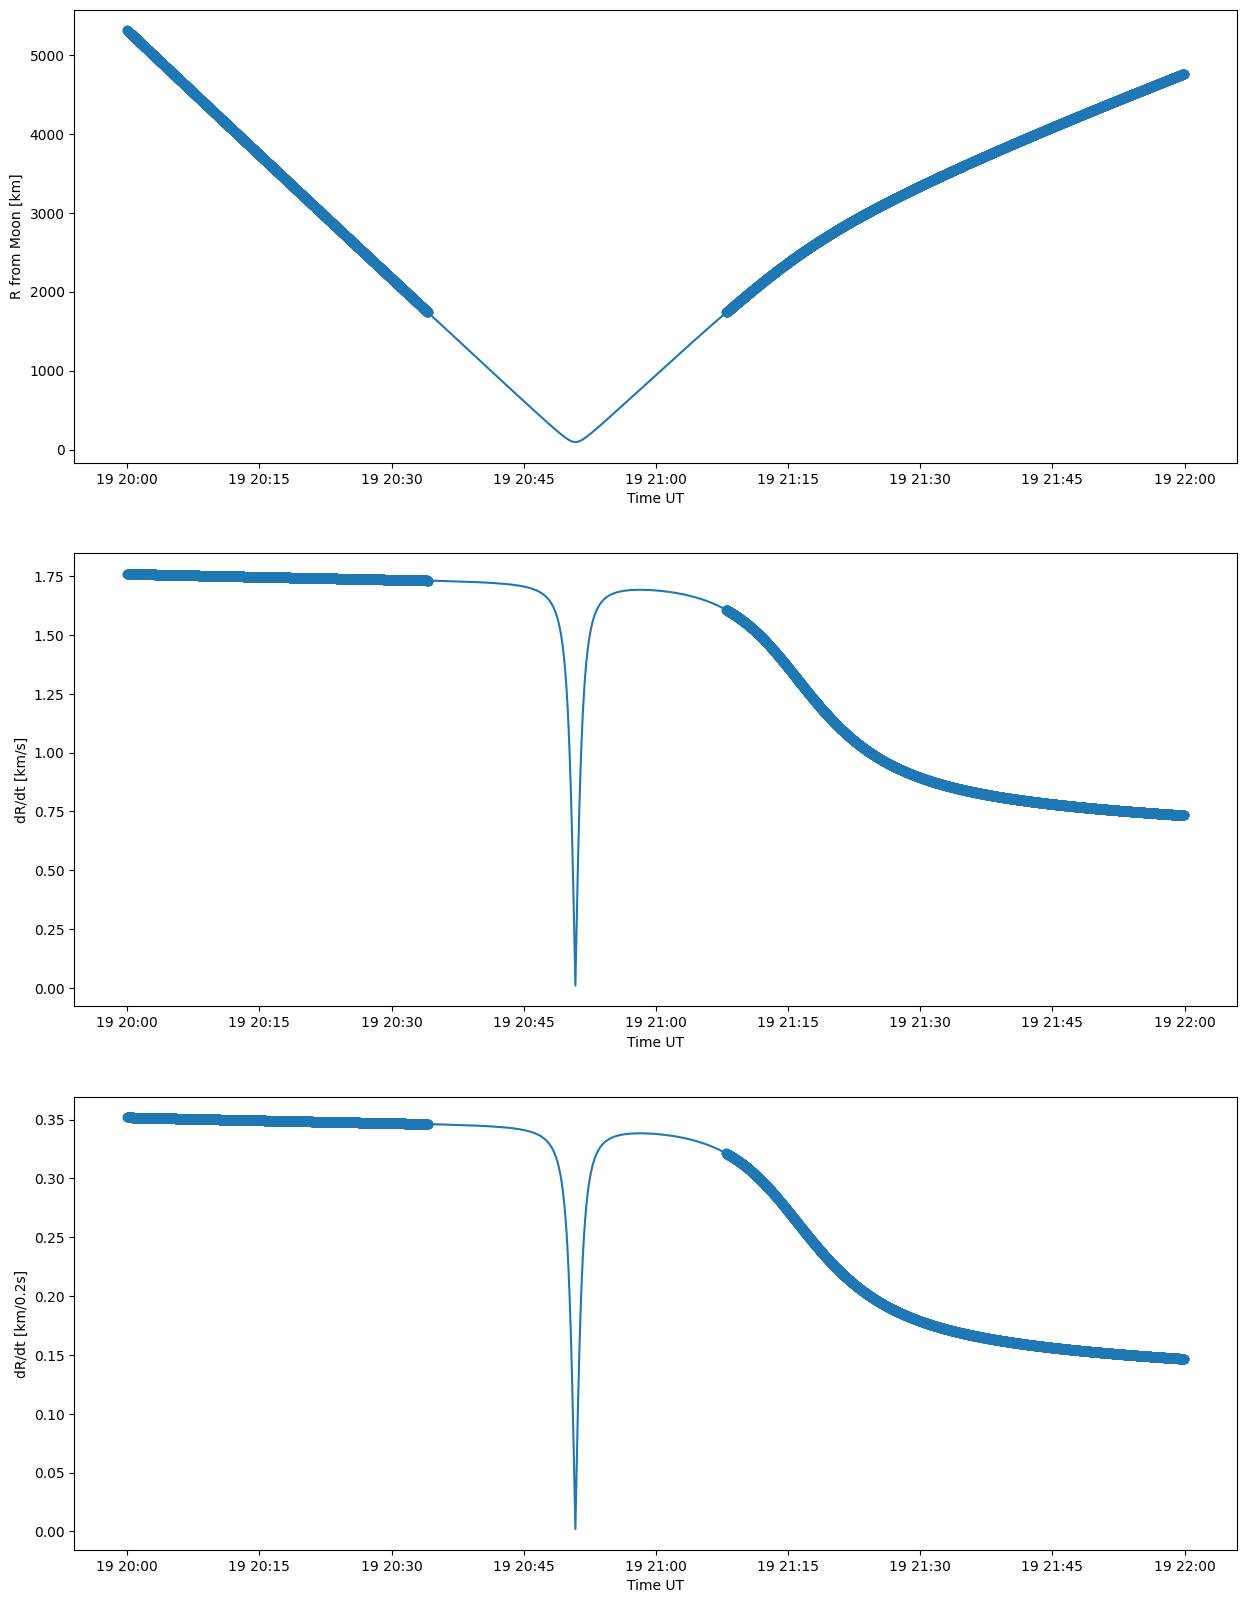

In [11]:
rl = 1737.4 # [km]
r_lim_ = np.sqrt(ym*ym + zm*zm)

d_lim = np.abs(r_lim_[0:len(r_lim_)-2]-r_lim_[1:len(r_lim_)-1])
r_lim = r_lim_[0:len(r_lim_)-2]
td = td[0:len(r_lim_)-2]

idx = np.where(r_lim > rl)
r_lim_p = r_lim[idx]
d_lim_p = d_lim[idx]
td_p = td[idx]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15.0, 20.0))

ax1.plot(td,r_lim)
ax1.scatter(td_p,r_lim_p)
ax1.set_xlabel('Time UT')
ax1.set_ylabel('R from Moon [km]')

ax2.plot(td,d_lim)
ax2.scatter(td_p,d_lim_p)
ax2.set_xlabel('Time UT')
ax2.set_ylabel('dR/dt [km/s]')

ax3.plot(td,d_lim/5.0)
ax3.scatter(td_p,d_lim_p/5.0)
ax3.set_xlabel('Time UT')
ax3.set_ylabel('dR/dt [km/0.2s]')


Text(0, 0.5, 'dR/dt [km/0.2s], R=(Y^2+Z^2)^0.5')

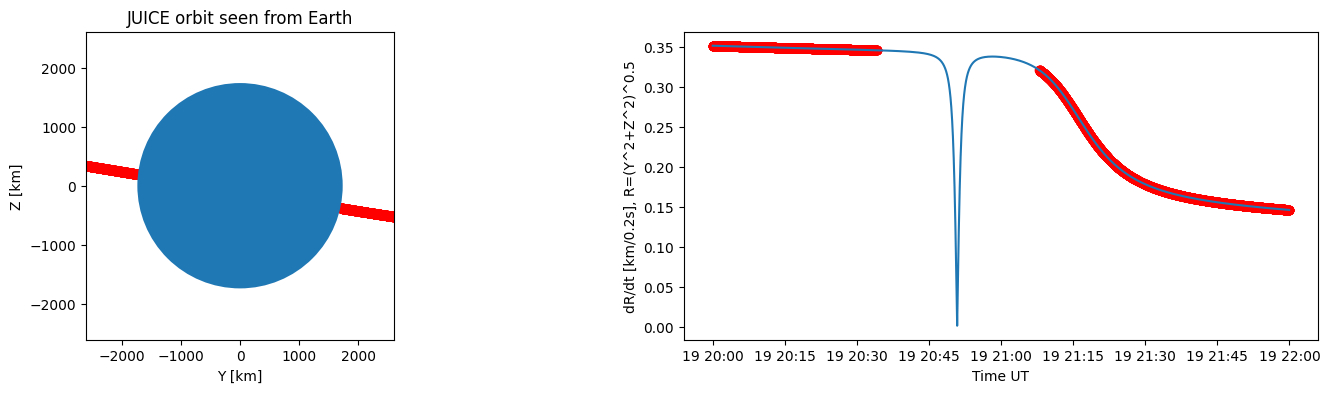

In [12]:
rl = 1737.4 # [km]
r_lim = np.sqrt(ym*ym + zm*zm)
idx = np.where(r_lim > rl)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18.0, 4.0))

ax1.scatter(ym[idx], zm[idx],c='red')
c = patches.Circle(xy=(0.0,0.0), radius=1737.4)
ax1.add_patch(c)
ax1.set_title('JUICE orbit seen from Earth')
ax1.set_xlabel('Y [km]')
ax1.set_ylabel('Z [km]')
ax1.set_xlim([-rl*1.5,rl*1.5])
ax1.set_ylim([-rl*1.5,rl*1.5])
ax1.set_aspect("equal", adjustable="box")

ax2.plot(td,d_lim/5.0)
ax2.scatter(td_p,d_lim_p/5.0, c="red")
ax2.set_xlabel('Time UT')
ax2.set_ylabel('dR/dt [km/0.2s], R=(Y^2+Z^2)^0.5')